In [1]:
import torch
print(torch.__version__)

1.7.1


A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU.    
To get more clarity about physical significance of tensors: https://www.youtube.com/watch?v=uaQeXi4E7gA

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu" #This is the best practice as it runs both on CPU and GPU machines
z = torch.tensor([[1,2,3], [4,5,6]],device =device, dtype = torch.float64,requires_grad = True) #device = "cuda" is part of attribute for running tensors on GPU,requires_grad is set to True if we need gradient computation later on in gradient descent type problems
print(z)
print(z.dtype)
print(z.device)
print(z.shape)
print(z.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64, requires_grad=True)
torch.float64
cpu
torch.Size([2, 3])
True


In PyTorch torch.Tensor is the main tensor class. So all tensors are just instances of torch.Tensor.

When you call torch.Tensor() you will get an empty tensor without any data.

In contrast torch.tensor is a function which returns a tensor.

So,torch.Tensor() can be used as a standalone fn. but torch.tensor() needs data in it,else it gives an error

In [3]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
print(x.shape)

torch.Size([2, 5])


In [7]:
y = torch.rand([2,5]) #rand is used to randomly initialise an array just like in numpy
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711],
        [0.9251, 0.3352, 0.7357, 0.9102, 0.0534]])


In [9]:
y.view([1,10]) #reshape in numpy as view in pytorch,but inplace is false,so when we print y in the next cell,the value is the same

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711, 0.9251, 0.3352, 0.7357, 0.9102,
         0.0534]])

In [10]:
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711],
        [0.9251, 0.3352, 0.7357, 0.9102, 0.0534]])


In [11]:
y = y.view([1,10])

In [12]:
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711, 0.9251, 0.3352, 0.7357, 0.9102,
         0.0534]])


In [20]:
# Other common initialization methods,these are usually used for initialisations when we write a class's __init__ method.
x = torch.empty(size=(3, 3))  # Tensor of shape 3x3 with uninitialized data
print(x)
x = torch.zeros((3, 3))  # Tensor of shape 3x3 with values of 0
print(x)
x = torch.rand((3, 3))  # Tensor of shape 3x3 with values from uniform distribution in interval [0,1)
print(x)
x = torch.ones((3, 3))  # Tensor of shape 3x3 with values of 1
print(x)
x = torch.eye(5, 5)  # Returns Identity Matrix I, (I <-> Eye), matrix of shape 2x3
print(x)
x = torch.arange(start=0, end=5, step=1)  # Tensor [0, 1, 2, 3, 4], note, can also do: torch.arange(11)
print(x)
x = torch.linspace(start=0.1, end=1, steps=10)  # x = [0.1, 0.2, ..., 1]
print(x)
x = torch.empty(size=(1, 5)).normal_(mean=0, std=1)  # Normally distributed with mean=0, std=1
print(x)
x = torch.empty(size=(1, 5)).uniform_(0, 1)  # Values from a uniform distribution low=0, high=1
print(x)
x = torch.diag(torch.ones(3))  # Diagonal matrix of shape 3x3
print(x)

tensor([[0.0000e+00, 0.0000e+00, 2.2599e-37],
        [0.0000e+00, 1.5695e-43, 0.0000e+00],
        [6.7262e-44, 0.0000e+00, 2.2615e-37]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.3749, 0.7887, 0.7627],
        [0.0587, 0.0465, 0.5615],
        [0.1756, 0.7525, 0.1821]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0, 1, 2, 3, 4])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])
tensor([[-0.5634, -0.1857,  2.6034, -0.6528,  0.3820]])
tensor([[0.8093, 0.7155, 0.8856, 0.9557, 0.3918]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [21]:
# How to make initialized tensors to other types (int, float, double)
# These will work even if you're on CPU or CUDA!
tensor = torch.arange(4)  # [0, 1, 2, 3] Initialized as int64 by default
print(f"Converted Boolean: {tensor.bool()}")  # Converted to Boolean: 1 if nonzero
print(f"Converted int16 {tensor.short()}")  # Converted to int16
print(f"Converted int64 {tensor.long()}")  # Converted to int64 (This one is very important, used super often)
print(f"Converted float16 {tensor.half()}")  # Converted to float16
print(f"Converted float32 {tensor.float()}")  # Converted to float32 (This one is very important, used super often)
print(f"Converted float64 {tensor.double()}")  # Converted to float64


Converted Boolean: tensor([False,  True,  True,  True])
Converted int16 tensor([0, 1, 2, 3], dtype=torch.int16)
Converted int64 tensor([0, 1, 2, 3])
Converted float16 tensor([0., 1., 2., 3.], dtype=torch.float16)
Converted float32 tensor([0., 1., 2., 3.])
Converted float64 tensor([0., 1., 2., 3.], dtype=torch.float64)


In [22]:
# Array to Tensor conversion and vice-versa
import numpy as np

np_array = np.zeros((5, 5))
tensor = torch.from_numpy(np_array)
np_array_again = (tensor.numpy())  # np_array_again will be same as np_array (perhaps with numerical round offs)

Tensor Math & Comparison Operations

In [4]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])
print("x",x)
print("y",y)


x tensor([1, 2, 3])
y tensor([9, 8, 7])


In [24]:
# -- Addition --
z1 = torch.empty(3)
print("z1",z1)
torch.add(x, y, out=z1)  # This is one way
print("z1",z1)
z2 = torch.add(x, y)  # This is another way
print("z2",z2)
z = x + y  # This is my preferred way, simple and clean.

z1 tensor([-4.4614e-15,  4.5787e-41,  2.1928e-37])
z1 tensor([10., 10., 10.])
z2 tensor([10, 10, 10])


Initially z1 was empty so it initialised by using some garbage values   
.add() function takes both adding inputs and also an output here z1,so we got tensor as (10 10 10) i.e(1+9 2+8 3+7)     
Other methods are just doing it the pythonic way

In [26]:
# -- Subtraction --
z = x - y  # We can do similarly as the preferred way of addition
print(z)

tensor([-8, -6, -4])


In [4]:
# -- Division (A bit clunky) --
z = x/y
print(z)
z = torch.true_divide(x, y)  # Will do element wise division if of equal shape
print("z by true_divide:",z)
#Note that true_divide() will work only in torch version 1.7 or above,I upgraded my library from 1.3 to 1.7 to run it

tensor([0.1111, 0.2500, 0.4286])
z by true_divide: tensor([0.1111, 0.2500, 0.4286])


In [33]:
# -- Inplace Operations --
t = torch.zeros(3)

t.add_(x)  # Whenever we have operation followed by _ it will mutate the tensor inplace(similar to inplace = True in pandas)
t += x  # Also inplace: t = t + x is not inplace, bit confusing.


In [34]:
print(t) #Here we did inplace using add_() fn as well as we added inplace the pythonic way so t = 2x

tensor([2., 4., 6.])


In [37]:
# -- Exponentiation (Element wise if vector or matrices) --
z = x.pow(2)  # z = [1, 4, 9]
z = x ** 2  # z = [1, 4, 9]

print(z)

tensor([1, 4, 9])


In [39]:
# -- Simple Comparison --
z = x > 0  # Returns [True, True, True]
print(z)
z = x < 0  # Returns [False, False, False]
print(z)


tensor([True, True, True])
tensor([False, False, False])


In [40]:
# -- Matrix Multiplication --
x1 = torch.rand((2, 5))
x2 = torch.rand((5, 3))
x3 = torch.mm(x1, x2)  # Matrix multiplication of x1 and x2, out shape: 2x3
print(x3)
x3 = x1.mm(x2)  # Similar as line above
print(x3)
#Matrix multiplication is done using the fn .mm()

tensor([[1.3463, 1.4367, 1.0308],
        [1.8441, 2.0100, 1.0919]])
tensor([[1.3463, 1.4367, 1.0308],
        [1.8441, 2.0100, 1.0919]])


In [5]:
# -- Matrix Exponentiation -- #Matrix multiplication(matrix cube here) can either be done as matrix*matrix*matrix or matrix_power(3)
matrix_exp = torch.rand(5, 5)
print(matrix_exp.matrix_power(3))  # is same as matrix_exp (mm) matrix_exp (mm) matrix_exp i.e multiplying the matrix with itself thrice here

tensor([[4.9631, 7.4081, 5.7920, 6.7411, 6.0805],
        [4.0699, 6.2339, 4.8884, 5.5674, 5.0909],
        [5.3770, 8.2195, 6.3010, 7.3865, 6.8073],
        [4.1232, 5.9994, 4.5968, 5.5170, 4.9846],
        [3.3668, 5.1938, 3.8890, 4.5114, 4.3595]])


In [6]:
# -- Element wise Multiplication --
z = x * y  # z = [9, 16, 21] = [1*9, 2*8, 3*7]
print(z)

# -- Dot product --
z = torch.dot(x, y)  # Dot product, in this case z = 1*9 + 2*8 + 3*7
print(z)


tensor([ 9, 16, 21])
tensor(46)


Lets understand shapes in general.  
In the first shape (3,2) => three groups of two elements each
In the second shape (4,3,2) => four groups of three groups of two elements each i.e Total elements = ({2(per array)} * 3(per group1) ) * 4(per group2) = 24   
This is exactly what is printed when I flattened the matrix,I got 24 elements printed as length
Similarly,the last shape (5,4,3,2) => Total elements = (5) 4 (3) * 2 = 120

In [8]:
import numpy as np
p = np.ones((3,2))
print(p)
print("----")
q = np.ones((4,3,2))
print(q)
print(len(q.reshape(-1,1)))
print("----")
r = np.ones((5,4,3,2))
print(r)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
----
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
24
----
[[[[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]]]


In [11]:
# -- Batch Matrix Multiplication --
batch = 32
n = 10
m = 20
p = 30
tensor1 = torch.rand((batch, n, m))
tensor2 = torch.rand((batch, m, p))
out_bmm = torch.bmm(tensor1, tensor2)  # Will be shape: (batch x n x p)
print(out_bmm)

#This is like let tensors be of shape(4,3,2) and (4,2,5) then first tensor has 4 groups of (3,2) shape while second tensor has 4 groups of (2,5) shape,so result is matrix multiplication of 0th element of first tensor with 0th element of second tensor and so on.So we are doing internal matrix multiplication.

tensor([[[5.0801, 5.8107, 4.3462,  ..., 4.7078, 5.5737, 4.8651],
         [5.3864, 5.9596, 4.7107,  ..., 5.6850, 5.1224, 5.3643],
         [4.6892, 4.7288, 3.4866,  ..., 4.9047, 4.0650, 3.8128],
         ...,
         [4.0437, 4.4266, 3.4323,  ..., 3.7891, 3.1812, 3.6197],
         [6.9458, 7.0410, 5.5873,  ..., 6.1765, 6.0298, 5.7099],
         [5.2996, 5.0030, 3.5179,  ..., 5.3515, 4.9107, 4.0785]],

        [[6.2235, 6.9336, 6.0647,  ..., 6.3257, 5.9475, 6.1217],
         [7.6693, 8.1500, 5.8221,  ..., 6.3652, 7.6206, 6.6013],
         [7.1662, 7.1425, 6.1693,  ..., 5.1591, 6.7365, 5.6577],
         ...,
         [6.0033, 6.1650, 5.9129,  ..., 4.6656, 5.5435, 5.8572],
         [6.5486, 6.8060, 5.6628,  ..., 5.2217, 6.0811, 6.6942],
         [7.1288, 6.9807, 6.1084,  ..., 6.0383, 6.7269, 6.7827]],

        [[5.1248, 6.7672, 6.0734,  ..., 5.2271, 5.0484, 5.4493],
         [4.2199, 5.7447, 4.9908,  ..., 5.4502, 5.1859, 5.9011],
         [5.6054, 7.4857, 6.1310,  ..., 5.4573, 5.5505, 5.

In [12]:
# -- Example of broadcasting --
x1 = torch.rand((5, 5))
x2 = torch.ones((1, 5))
#x2 increased from (1,5) to (5,5) and then operations like subtraction is done
z = (x1 - x2)  # Shape of z is 5x5: How? The 1x5 vector (x2) is subtracted for each row in the 5x5 (x1)
z = (x1 ** x2)  # Shape of z is 5x5: How? Broadcasting! Element wise exponentiation for every row



In [5]:
# Other useful tensor operations
sum_x = torch.sum(x, dim=0)  # Sum of x across dim=0 (which is the only dim in our case), sum_x = 6
values, indices = torch.max(x, dim=0)  # Can also do x.max(dim=0)
values, indices = torch.min(x, dim=0)  # Can also do x.min(dim=0)
abs_x = torch.abs(x)  # Returns x where abs function has been applied to every element
z = torch.argmax(x, dim=0)  # Gets index of the maximum value
z = torch.argmin(x, dim=0)  # Gets index of the minimum value
mean_x = torch.mean(x.float(), dim=0)  # mean requires x to be float
z = torch.eq(x, y)  # Element wise comparison which elements are equal, in this case z = [False, False, False](x and y are defined in first cell of Tensor Math & Comparison Operations section)
sorted_y, indices = torch.sort(y, dim=0, descending=False)

z = torch.clamp(x, min=0)
# All values < 0 set to 0 and values > 0 unchanged (this is exactly ReLU function)
# If you want to values over max_val to be clamped, do torch.clamp(x, min=min_val, max=max_val)

x = torch.tensor([1, 0, 1, 1, 1], dtype=torch.bool)  # True/False values
z = torch.any(x)  # will return True, can also do x.any() instead of torch.any(x)
z = torch.all(x)  # will return False (since not all are True), can also do x.all() instead of torch.all()

Tensor Indexing

In [6]:
batch_size = 10
features = 25
x = torch.rand((batch_size, features)) #This gives us a tensor of batch_size groups with tensor of 25 elements

# Get first examples features
print(x[0].shape)  # shape [25], this is same as doing x[0,:]

# Get the first feature for all examples
print(x[:, 0].shape)  # shape [10]

# For example: Want to access third example in the batch and the first ten features
print(x[2, 0:10].shape)  # shape: [10]

# For example we can use this to, assign certain elements
x[0, 0] = 100

# Fancy Indexing
x = torch.arange(10)
indices = [2, 5, 8]
print(x[indices])  # x[indices] = [2, 5, 8]

x = torch.rand((3, 5))
rows = torch.tensor([1, 0])
cols = torch.tensor([4, 0])
print(x[rows, cols])  # In this we define the rows list as a tensor, the columns list as a tensor and get the rows,cols value as a whole for tensor

# More advanced indexing
x = torch.arange(10)
print(x[(x < 2) | (x > 8)])  # This will give out all values less than 2 or greater than 8 in range [0,10),  i.e [0, 1, 9]
print(x[x.remainder(2) == 0])  # This will give values of x such that remainder of x divided by 2 is 0

# Useful operations for indexing
print(torch.where(x > 5, x, x * 2))  # If values of x > 5 then give x, else x*2 i.e values of [0,5] given [2,10] and others are left unchanged 
#i.e [0, 2, 4, 6, 8, 10, 6, 7, 8, 9], 
x = torch.tensor([0, 0, 1, 2, 2, 3, 4]).unique()  # x = [0, 1, 2, 3, 4]
y = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(y.ndimension())  # The number of dimensions, in this case its 2
x = torch.arange(10)
print(x.numel())  # The number of elements in x (in this case it's trivial because it's just a vector)



torch.Size([25])
torch.Size([10])
torch.Size([10])
tensor([2, 5, 8])
tensor([0.4701, 0.3722])
tensor([0, 1, 9])
tensor([0, 2, 4, 6, 8])
tensor([ 0,  2,  4,  6,  8, 10,  6,  7,  8,  9])
2
10


Tensor Reshaping

In [7]:
x = torch.arange(9)

# Let's say we want to reshape it to be 3x3
x_3x3 = x.view(3, 3)
print(x_3x3)
x_3x3 = x.reshape(3, 3)
print(x_3x3)
#.view() and .reshape() are similar and both can be used to reshape tensors but view acts on contiguous block of data which is usually the case whereas reshape just copies the data and so it will work but slows down a bit due to extra copying.We may find some difference when we deal on parallel processing using GPU

y = x_3x3.t() #.t() is used for transpose
print(y)


tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


In [ ]:
Note that when we did the transpose for a 3*3 matrix we are indirectly jumping three spots before we print the numbers.

In [8]:
print(y.view(9))

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

As we can see,we get an error stating that view size is not compatible and to use reshape fn.

In [9]:
print(y.reshape(9)) #Now this works fine.This can be attributed to the fact that our view doesn't copy the whole tensor so its unable to work on non-contiguous memory locations.reshape on the other hand was able to do this fine.

tensor([0, 3, 6, 1, 4, 7, 2, 5, 8])


In [10]:
print(y.is_contiguous()) #Since our y is not contiguous it returned false.

False


In [11]:
print(y.contiguous().view(9))  # Calling .contiguous() before view and it works

tensor([0, 3, 6, 1, 4, 7, 2, 5, 8])


In [12]:
# Moving on to another operation, let's say we want to add two tensors dimensions togethor
x1 = torch.rand(2, 5)
x2 = torch.rand(2, 5)
print(torch.cat((x1, x2), dim=0).shape)  # We are concatenating along dimension:0(i.e along rows),so Shape: (2+2)x5 = 4x5
print(torch.cat((x1, x2), dim=1).shape)  # We are concatenating along dimension:1(i.e along columns),so Shape: 2x(5+5) = 2x10

torch.Size([4, 5])
torch.Size([2, 10])


In [13]:
#-1 is used to take all the elements available in its scope,so lets say you have 3 dimensions and you used -1 in the second dimension, then all the elements in first and second dimensions would be flattended.This logic applies to both Python and ofcourse Pytorch 
z = x1.view(-1)  
print(z)

# If we instead have an additional dimension and we wish to keep those as is we can do:
batch = 64
x = torch.rand((batch, 2, 5))
z = x.view(batch, -1)  # And z.shape would be 64x10, this is very useful stuff and is used all the time
print(z)

tensor([0.8809, 0.6489, 0.2104, 0.7858, 0.3837, 0.5788, 0.4812, 0.4150, 0.0668,
        0.2525])
tensor([[0.2279, 0.0743, 0.2565, 0.5150, 0.9447, 0.2360, 0.0143, 0.5955, 0.0713,
         0.8698],
        [0.3947, 0.1064, 0.4843, 0.3005, 0.9483, 0.0177, 0.4836, 0.6562, 0.9366,
         0.7811],
        [0.6170, 0.8206, 0.4830, 0.6206, 0.3691, 0.0333, 0.2067, 0.2904, 0.0341,
         0.9367],
        [0.5740, 0.6102, 0.3692, 0.9628, 0.9683, 0.7497, 0.4691, 0.4902, 0.0681,
         0.8908],
        [0.5045, 0.4768, 0.3775, 0.4484, 0.1774, 0.5315, 0.0501, 0.5063, 0.3207,
         0.5223],
        [0.1407, 0.6007, 0.2579, 0.0281, 0.9029, 0.9788, 0.3740, 0.5434, 0.9750,
         0.0315],
        [0.4572, 0.6740, 0.1211, 0.2490, 0.0948, 0.4227, 0.4666, 0.0139, 0.0512,
         0.6678],
        [0.8679, 0.6320, 0.2281, 0.2132, 0.8399, 0.3568, 0.2513, 0.9805, 0.0980,
         0.0162],
        [0.4636, 0.4058, 0.8052, 0.6095, 0.5273, 0.4704, 0.4250, 0.3084, 0.1446,
         0.0507],
        [0.9

In [14]:
# Let's say we want to switch x axis so that instead of 64x2x5 we have 64x5x2
# I.e we want dimension 0 to stay, dimension 1 to become dimension 2, dimension 2 to become dimension 1
print(x)
z = x.permute(0, 2, 1)
print(z)

tensor([[[0.2279, 0.0743, 0.2565, 0.5150, 0.9447],
         [0.2360, 0.0143, 0.5955, 0.0713, 0.8698]],

        [[0.3947, 0.1064, 0.4843, 0.3005, 0.9483],
         [0.0177, 0.4836, 0.6562, 0.9366, 0.7811]],

        [[0.6170, 0.8206, 0.4830, 0.6206, 0.3691],
         [0.0333, 0.2067, 0.2904, 0.0341, 0.9367]],

        [[0.5740, 0.6102, 0.3692, 0.9628, 0.9683],
         [0.7497, 0.4691, 0.4902, 0.0681, 0.8908]],

        [[0.5045, 0.4768, 0.3775, 0.4484, 0.1774],
         [0.5315, 0.0501, 0.5063, 0.3207, 0.5223]],

        [[0.1407, 0.6007, 0.2579, 0.0281, 0.9029],
         [0.9788, 0.3740, 0.5434, 0.9750, 0.0315]],

        [[0.4572, 0.6740, 0.1211, 0.2490, 0.0948],
         [0.4227, 0.4666, 0.0139, 0.0512, 0.6678]],

        [[0.8679, 0.6320, 0.2281, 0.2132, 0.8399],
         [0.3568, 0.2513, 0.9805, 0.0980, 0.0162]],

        [[0.4636, 0.4058, 0.8052, 0.6095, 0.5273],
         [0.4704, 0.4250, 0.3084, 0.1446, 0.0507]],

        [[0.9820, 0.9181, 0.4039, 0.1889, 0.2453],
         [0.0

In [ ]:
# Splits x last dimension into chunks of 2 (since 5 is not integer div by 2) the last dimension
# will be smaller, so it will split it into two tensors: 64x2x3 and 64x2x2
z = torch.chunk(x, chunks=2, dim=1)
print(z[0].shape)
print(z[1].shape)

# Let's say we want to add an additional dimension
x = torch.arange(10)  # Shape is [10], let's say we want to add an additional so we have 1x10
print(x.unsqueeze(0).shape)  # 1x10
print(x.unsqueeze(1).shape)  # 10x1

# Let's say we have x which is 1x1x10 and we want to remove a dim so we have 1x10
x = torch.arange(10).unsqueeze(0).unsqueeze(1)

# Perhaps unsurprisingly
z = x.squeeze(1)  # can also do .squeeze(0) both returns 1x10



Lets now analyse how to use a dataset from torch vision

In [13]:
import torchvision #The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.
from torchvision import transforms, datasets

In [15]:
train = datasets.MNIST("/home/manju838/coding/env/pytorch_env/Datasets/MNIST", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("/home/manju838/coding/env/pytorch_env/Datasets/MNIST", train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))
# Both train and test datasets are obtained from torchvision.datasets,datasets have MNIST and a few others,so we call that dataset using that particular name
#First parameter is where to store the dataset,I stored it in Datasets/MNIST folder,if train is true then its training data or its for testing,download is set to true,these datasets are not in form of tensors so convert them into tensors.


100.1%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
113.5%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
100.4%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
180.4%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
Processing...
Done!


In [18]:
trainset = torch.utils.data.DataLoader(train, batch_size=3, shuffle=True) #Batch size is training data in batches of size,shuffle is for randomising data
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [19]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([4, 0, 3])]


In [21]:
image, label = data[0][0],data[1][0]
print(label)

tensor(4)


These data are from MNIST Dataset,so you get handwritten digits and their corresponding labels between 0-9 inclusive.So for convenience,I iterated three handwritten digit images so I get a tensor of two tensors,the first representing tensor of images and the second representing tensor of corresponding labels.

In [22]:
data[0][0].type()

'torch.FloatTensor'

In [25]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


This is wierd since even grayscale images are (28,28) shape while we get an extra 1

In [26]:
import matplotlib.pyplot as plt 

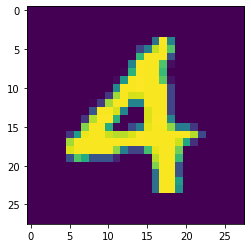

In [27]:
plt.imshow(data[0][0].view(28,28))

Now this matches perfectly with the result of label(0) i.e tensor(4)

In [28]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


We are checking how balanced our dataset is.The max is around 11% while the least is around 9%.So its not perfectly balanced but its okay for ~2% variation